In [46]:
import requests
import sys
import io
from bs4 import BeautifulSoup

In [58]:
s = requests.Session()
headers = { 'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.102 Safari/537.36' }
req = s.get('http://feeds.bbci.co.uk/news/rss.xml',headers=headers)
html = req.text

In [70]:
bs = BeautifulSoup ( html , "html.parser" )
fStr = []
cnt = 0
for item in bs.find_all('item'):
    fStr.append([])
    fStr[cnt].append(item.find_all(["title","description"])[0].get_text())
    fStr[cnt].append(item.find_all(["title","description"])[1].get_text())
    cnt+=1
print(fStr)

[['Covid: PM faces big rebellion as MPs vote on new restrictions', 'Around 70 Tory MPs are expected to vote against some new rules - but Labour will vote in favour.'], ['Covid: Call for volunteers as 500k book boosters in a day', 'The government is aiming to give one million jabs a day across the UK during the rest of December.'], ['Job vacancies hit another record high', 'The number of openings is now 434,500 higher than pre-pandemic levels - but growth is slowing.'], ['Man Utd Covid outbreak leads to match postponement', "Manchester United's Premier League match against Brentford on Tuesday has been postponed after a Covid-19 outbreak at the Old Trafford club."], ['Canada offers up to $40bn to compensate indigenous children', 'It comes after a lengthy legal battle over the abuse of native children held in government care.'], ['Harry Dunn crash: Anne Sacoolas case to go before UK court', 'Magistrates in London will hear the case concerning the death of motorcyclist Harry Dunn.'], ["Tw

In [57]:
fStr[0]

['Covid: PM faces big rebellion as MPs vote on new restrictions',
 'Around 70 Tory MPs are expected to vote against some new rules - but Labour will vote in favour.']

In [78]:
str=""
for i in range(45):
    str=str.join(fStr[i])

In [81]:
str

"Max Verstappen: Formula 1's 'bull fighter' & the family that shaped himAfghan women: Secret diaries of changing livesMeth and heroin fuel Afghanistan drugs boomStorm Arwen: Why power cuts left people unable to phone for helpOmicron: What are the new Covid rules for the UK?Omicron: Should I be working from home now?Is a million boosters a day achievable? And other questionsCovid-19 in the UK: How many coronavirus cases are there in my area?Omicron: Who can have a booster jab and how do I book one?Omicron: What are the Covid self-isolation rules now?Covid passports: Where will I need a pass and how do I get one?Paris 2024 opening ceremony to break with tradition and take place on River SeineHolders Chelsea face Lille in Champions League while Liverpool play Inter after last-16 draw chaosJustin Herbert, Tom Brady & Jakeem Grant in NFL plays of the weekVerstappen reveals Hamilton and Mercedes boss Wolff both congratulated him on titleSports Personality 2021: Tom Daley - meet the contender

In [34]:
from nltk.tokenize import sent_tokenize ,word_tokenize, RegexpTokenizer
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk import Text
from nltk.tag import pos_tag
from nltk import FreqDist
from nltk.tag import pos_tag

In [35]:
retokenize =RegexpTokenizer('[\w]+')

In [89]:
stopwords = ["s", "title", "and", "t", "I", "m"]
str_tokens = pos_tag(retokenize.tokenize(str))

In [90]:
names_list = [t[0] for t in str_tokens if t[1] == "NN" and t[0] not in stopwords]
fd_names = FreqDist(names_list)
fd_names.N()

207

In [91]:
fd_names.most_common(5)

[('power', 3), ('home', 3), ('booster', 3), ('place', 3), ('government', 3)]

In [92]:
text = Text(retokenize.tokenize(str))
text

<Text: Max Verstappen Formula 1 s bull fighter the...>

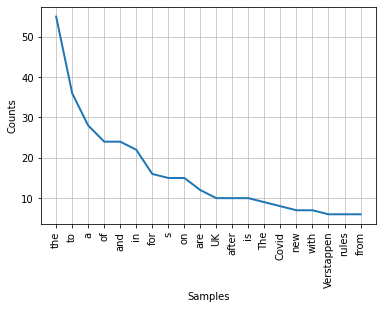

In [94]:
text.plot(20)

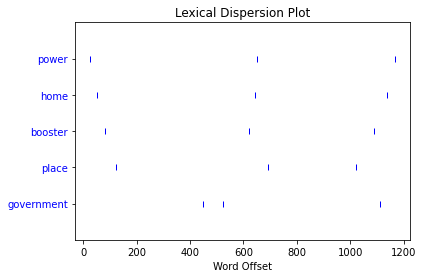

In [95]:
text.dispersion_plot(['power','home','booster','place','government'])

In [96]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

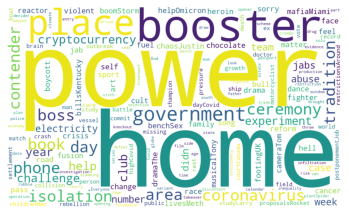

In [97]:
wc=WordCloud(width=1000, height=600, background_color='white',random_state=0)
plt.imshow(wc.generate_from_frequencies(fd_names))
plt.axis('off')
plt.show()